Primeras filas del dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Resumen estadístico de las variables numéricas:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


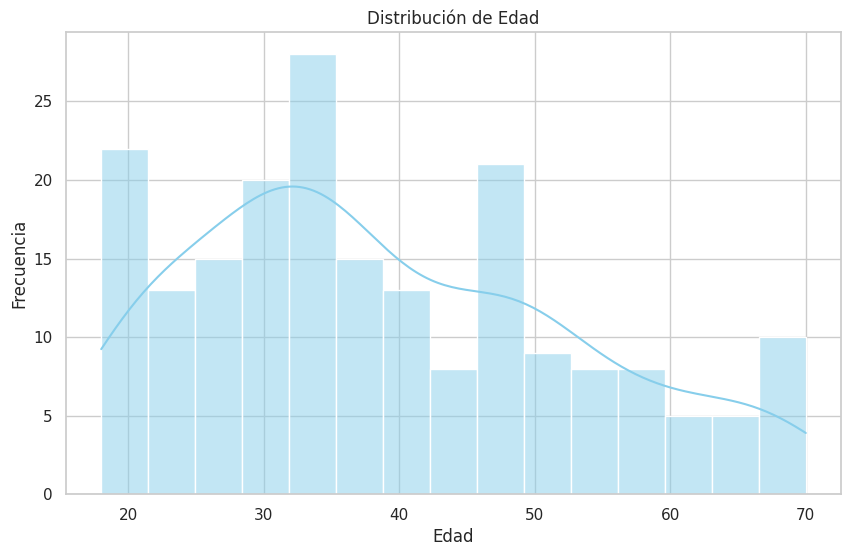

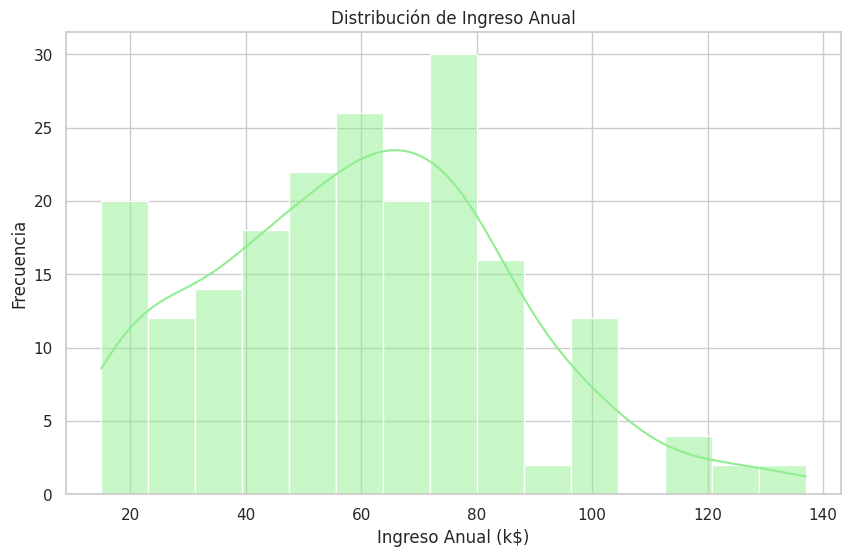

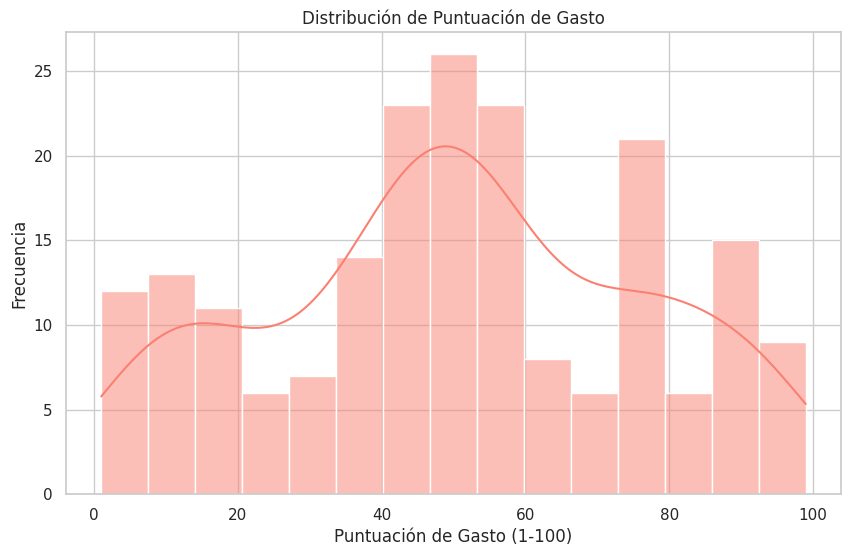

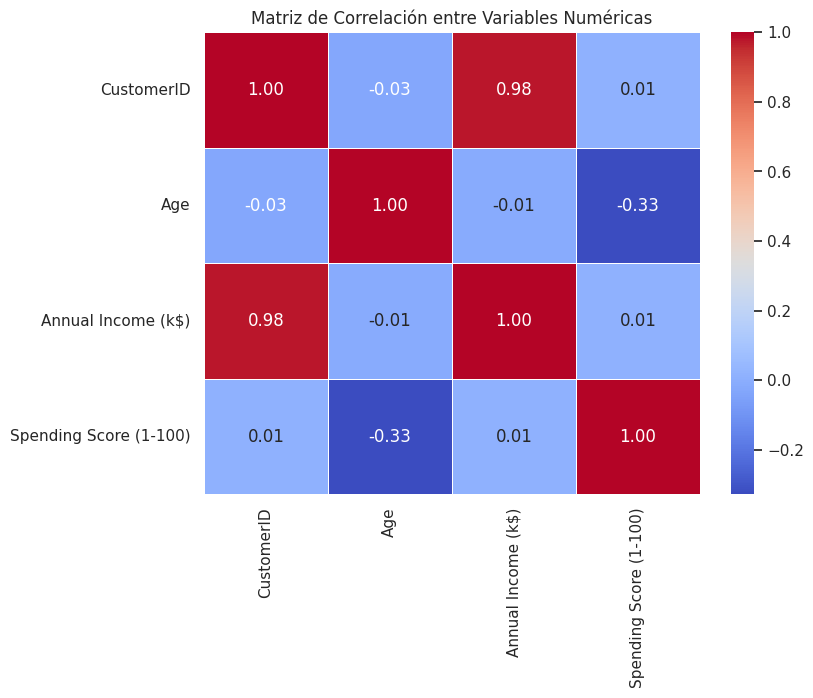

Valores faltantes por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Vista previa de los datos después de codificar 'Gender':


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40



Vista previa de las características escaladas:


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


<Figure size 1200x800 with 0 Axes>

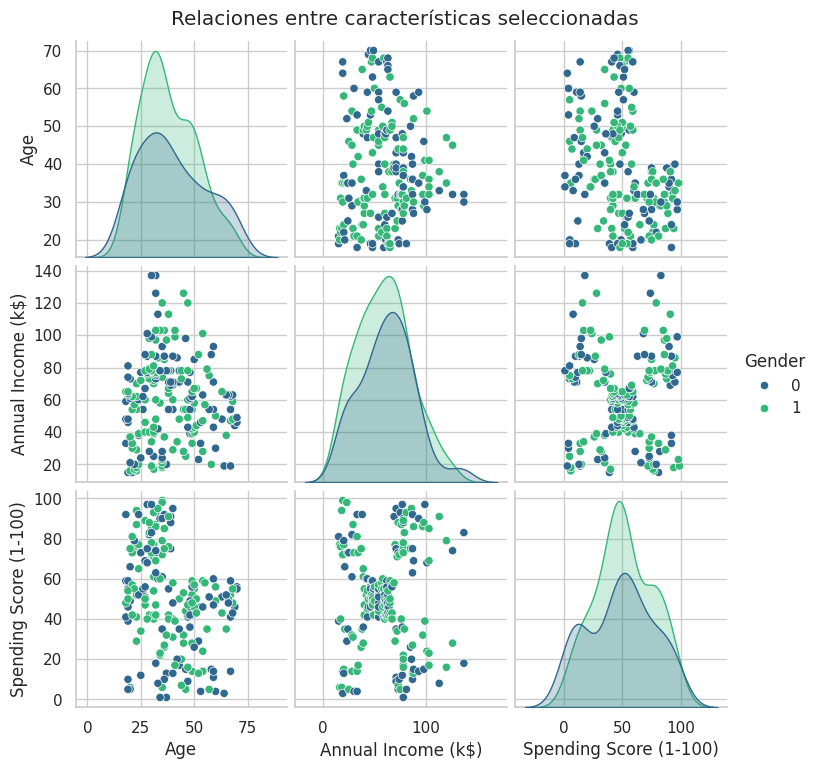

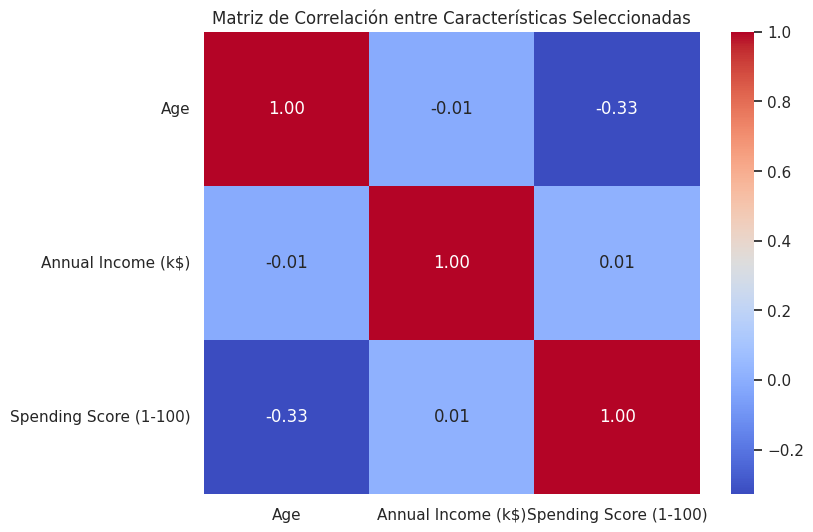

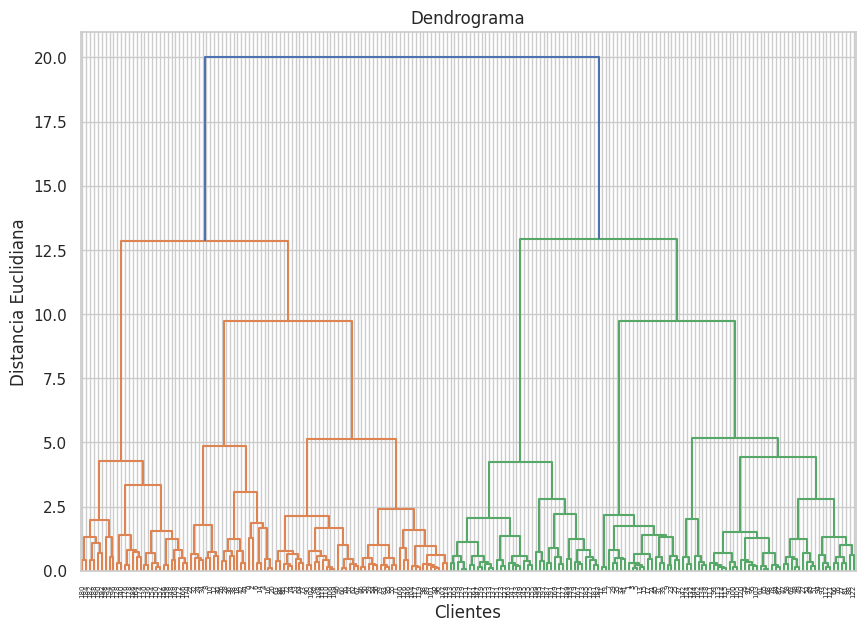


Distribución de clientes por cluster:
Cluster
0    66
1    45
2    39
3    28
4    22
Name: count, dtype: int64
Coeficiente de Silhouette para 5 clusters: 0.39
Índice de Calinski-Harabasz para 5 clusters: 107.83


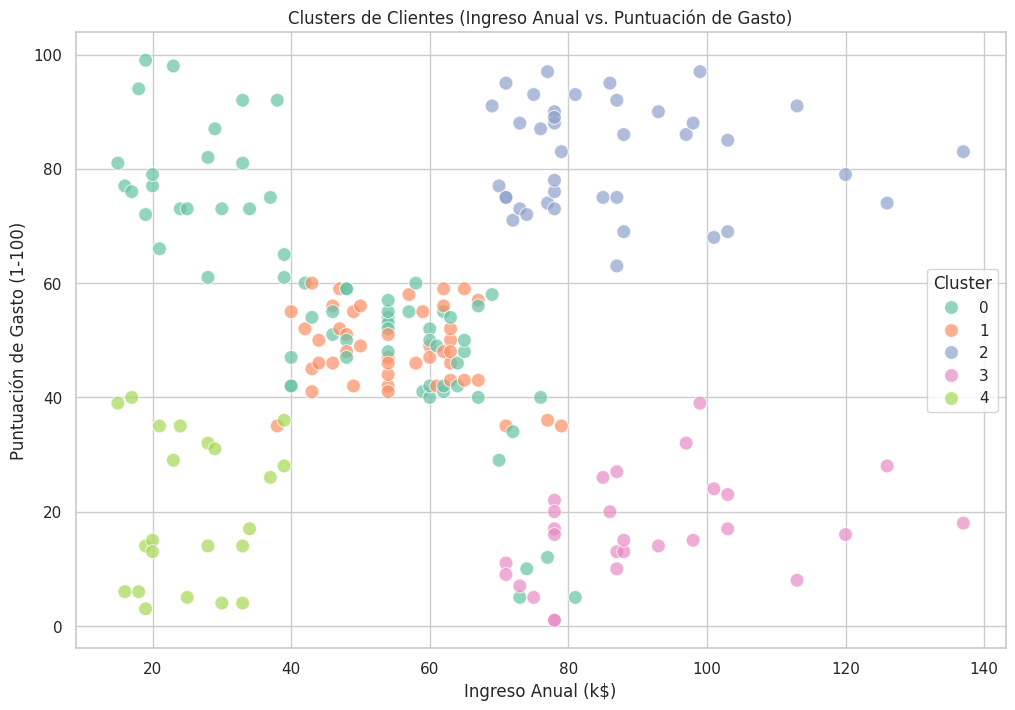

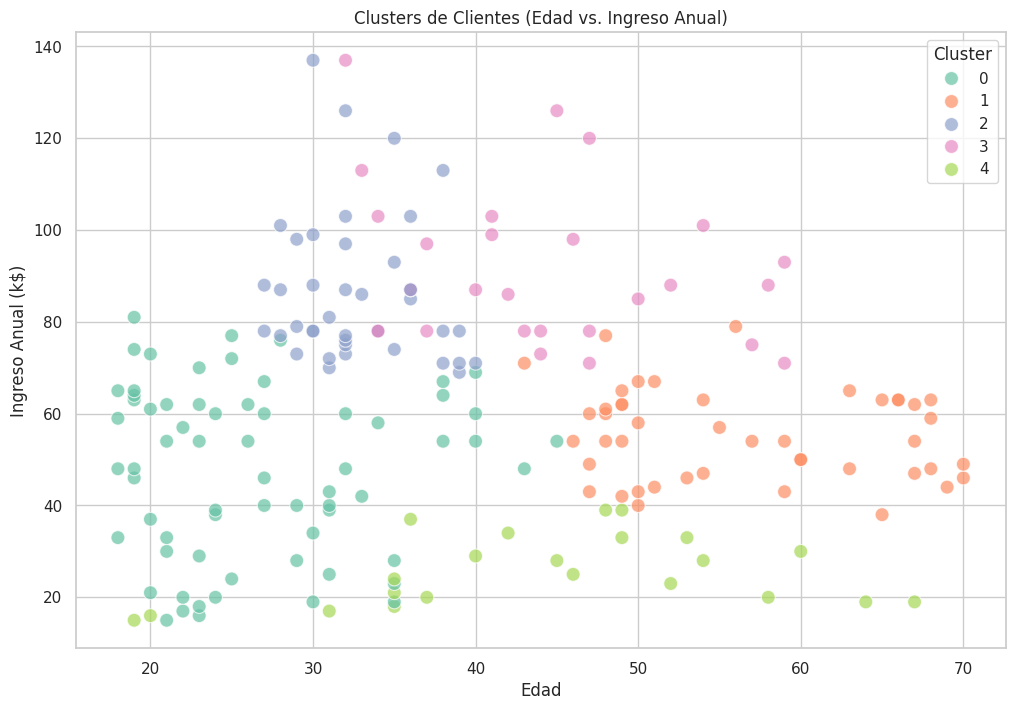

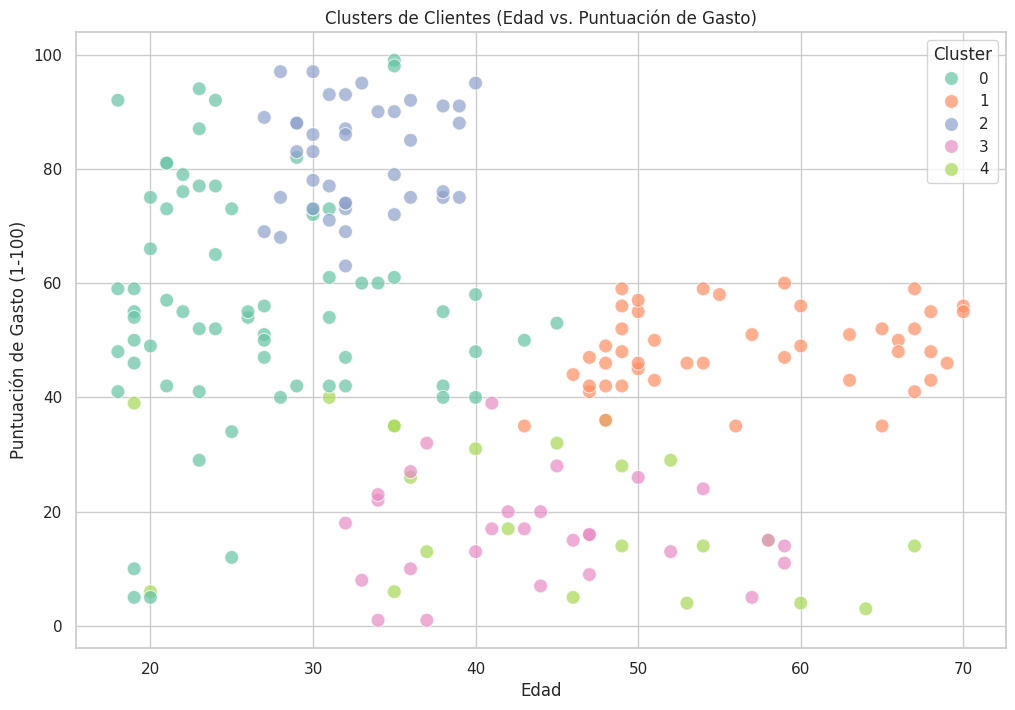

In [ ]:
# Importar las librerías necesarias:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo de gráficos:
%matplotlib inline
sns.set(style="whitegrid")


# Paso 1:

# Cargar el dataset:
df = pd.read_csv('Mall_Customers.csv')

# Verificar la estructura y los primeros registros del dataset:
print("Primeras filas del dataset:")
display(df.head())

# Información general del dataset:
print("\nInformación del dataset:")
df.info()

# Resumen estadístico de las variables numéricas:
print("\nResumen estadístico de las variables numéricas:")
display(df.describe())

# Visualización de la distribución de la variable 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de la variable 'Annual Income (k$)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=15, kde=True, color='lightgreen')
plt.title('Distribución de Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de la variable 'Spending Score (1-100)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], bins=15, kde=True, color='salmon')
plt.title('Distribución de Puntuación de Gasto')
plt.xlabel('Puntuación de Gasto (1-100)')
plt.ylabel('Frecuencia')
plt.show()


# Análisis de las relaciones entre variables numéricas mediante un mapa de calor de la matriz de correlación:
plt.figure(figsize=(8, 6))

# Seleccionar solo las columnas numéricas:
df_numeric = df.select_dtypes(include=['number'])

# Crear la matriz de correlación solo para las columnas numéricas:
correlation_matrix = df_numeric.corr()

# Visualizar la matriz de correlación:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()




# Paso 2:
# Revisar valores faltantes:
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Codificar la variable categórica 'Gender' como numérica:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Comprobar la transformación:
print("\nVista previa de los datos después de codificar 'Gender':")
display(df.head())

# Seleccionar sólo las columnas numéricas a utilizar en el Clustering:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Escalar las características:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Crear un nuevo DataFrame con las características escaladas:
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

print("\nVista previa de las características escaladas:")
display(features_scaled_df.head())




# Paso 3:
# Visualización de las relaciones entre las características seleccionadas:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']], hue='Gender', palette="viridis")
plt.suptitle("Relaciones entre características seleccionadas", y=1.02)
plt.show()

# Matriz de correlación para verificar la relación entre características:
plt.figure(figsize=(8, 6))
sns.heatmap(features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de Correlación entre Características Seleccionadas')
plt.show()


# Paso 4:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Escalar las características:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Generar el dendrograma para los datos escalados:
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(features_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

# Definir y entrenar el modelo de clustering jerárquico basado en el número de clusters observado en el dendrograma:
n_clusters = 5
hc_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
# Ajustar el valor según el dendrograma

# Ajustar el modelo a los datos escalados y obtener etiquetas de cluster:
cluster_labels = hc_model.fit_predict(features_scaled)

# Agregar las etiquetas de cluster al DataFrame original:
df['Cluster'] = cluster_labels

print("\nDistribución de clientes por cluster:")
print(df['Cluster'].value_counts())




# Paso 5:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calcular el Coeficiente de Silhouette:
silhouette_avg = silhouette_score(features_scaled, cluster_labels)
print(f"Coeficiente de Silhouette para {n_clusters} clusters: {silhouette_avg:.2f}")

# Calcular el Índice de Calinski-Harabasz:
calinski_harabasz = calinski_harabasz_score(features_scaled, cluster_labels)
print(f"Índice de Calinski-Harabasz para {n_clusters} clusters: {calinski_harabasz:.2f}")



# Paso 6:
import matplotlib.pyplot as plt
import seaborn as sns

# Asignar una paleta de colores a los clusters para su visualización:
palette = sns.color_palette("Set2", n_clusters)

# Diagrama de dispersión entre Ingreso Anual y Puntuación de Gasto:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="Annual Income (k$)", y="Spending Score (1-100)",
    hue="Cluster", data=df, palette=palette, s=100, alpha=0.7
)
plt.title("Clusters de Clientes (Ingreso Anual vs. Puntuación de Gasto)")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntuación de Gasto (1-100)")
plt.legend(title="Cluster")
plt.show()

# Diagrama de dispersión entre Edad e Ingreso Anual:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="Age", y="Annual Income (k$)",
    hue="Cluster", data=df, palette=palette, s=100, alpha=0.7
)
plt.title("Clusters de Clientes (Edad vs. Ingreso Anual)")
plt.xlabel("Edad")
plt.ylabel("Ingreso Anual (k$)")
plt.legend(title="Cluster")
plt.show()

# Diagrama de dispersión entre Edad y Puntuación de Gasto:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="Age", y="Spending Score (1-100)",
    hue="Cluster", data=df, palette=palette, s=100, alpha=0.7
)
plt.title("Clusters de Clientes (Edad vs. Puntuación de Gasto)")
plt.xlabel("Edad")
plt.ylabel("Puntuación de Gasto (1-100)")
plt.legend(title="Cluster")
plt.show()



